In [2]:
from impedance.models.circuits.elements import element
from impedance.models.circuits import CustomCircuit
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mpmath import *
from models import *

In [81]:
R1=1000
R2=2000
Q=6e-4
delta1=0.1
alpha=0.9

# R1, R1Q, R2Q, delta1, alpha = 1000, 1000*1e-4, 2000*1e-4, 0.4, 1

param_to_sim=[R1, R1*Q, R2*Q, delta1, alpha]
c_sim_two=CustomCircuit(initial_guess=param_to_sim,circuit="TLMtwo")

freq=np.logspace(0,3,100)

z_sim_two=c_sim_two.predict(frequencies=freq)
# plt.plot(np.real(z_sim_two),-np.imag(z_sim_two))
# plt.gca().set_aspect("equal")

c:\Users\Gaming\AppData\Local\Programs\Python\Python311\Lib\site-packages\impedance\models\circuits\circuits.py:145: UserWarning: Simulating circuit based on initial parameters
  warnings.warn("Simulating circuit based on initial parameters")


In [86]:
param_to_fit=[R1*1.5, R1*Q*1.5, R2*Q*1.7, 0.7, alpha]
c_fit_two=CustomCircuit(initial_guess=param_to_fit,circuit="TLMtwo")
c_fit_two.fit(impedance=z_sim_two,frequencies=freq,bounds=((0,0,0,0,0.5),(np.inf,np.inf,np.inf,1,1)))

R1_fit=c_fit_two.parameters_[0]
Q_fit=c_fit_two.parameters_[1]/c_fit_two.parameters_[0]
R2_fit=c_fit_two.parameters_[2]/Q_fit
delta1_fit=c_fit_two.parameters_[3]
alpha_fit=c_fit_two.parameters_[4]

In [87]:
print(c_fit_two)


Circuit string: TLMtwo
Fit: True

Initial guesses:
  TLMtwo_0 = 1.50e+03 [Ohm]
  TLMtwo_1 = 9.00e-01 [Ohm F]
  TLMtwo_2 = 2.04e+00 [Ohm F]
  TLMtwo_3 = 7.00e-01 []
  TLMtwo_4 = 9.00e-01 []

Fit parameters:
  TLMtwo_0 = 1.88e+03  (+/- 1.55e+02) [Ohm]
  TLMtwo_1 = 1.07e+00  (+/- 1.80e-01) [Ohm F]
  TLMtwo_2 = 3.06e+02  (+/- 4.77e+02) [Ohm F]
  TLMtwo_3 = 9.60e-01  (+/- 5.05e-02) []
  TLMtwo_4 = 1.00e+00  (+/- 1.51e-03) []



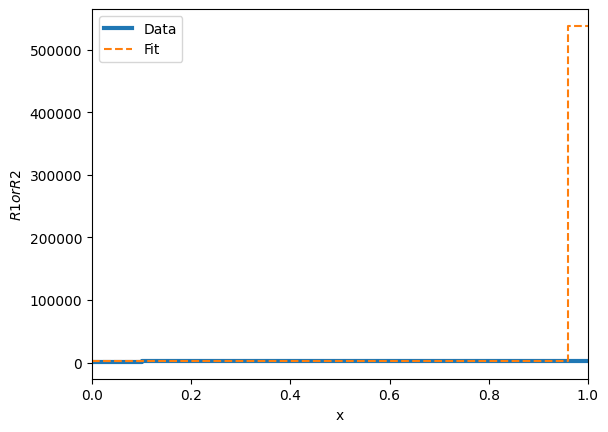

In [88]:
fig, ax=plt.subplots()
x=np.linspace(0,1)
#plot the original data R1 and R2 values
ax.plot([0,delta1,delta1,1],[R1,R1,R2,R2],linewidth=3)

#plot the fitted R1 and R2 values
ax.plot([0,delta1_fit,delta1_fit,1],[R1_fit,R1_fit,R2_fit,R2_fit],linestyle="--")

ax.set_xlabel("x")
ax.set_ylabel("$R1 or R2$")
ax.set_xmargin(0)
ax.legend(["Data","Fit"])